# a) Problem Statement

To develop an algorithm that can accurately predict customers who are likely to churn.

# b) Exploratory Data Analysis

##### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

##### Load Modified Data

In [2]:
df = pd.read_csv('BDA601_Assessment 2_Telco-Customer-Churn_downloaded 05082020.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check shape of dataframe ( rows & Columns)
df.shape

(7043, 21)

In [4]:
# Check Available columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* 75% customers have tenure less than 55 months

##### Preprocessing

In [7]:
cleaned_data = df.drop(['customerID','tenure'], axis =1)
cleaned_data.shape

(7043, 19)

In [8]:
cleaned_data.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
cleaned_data['gender'] = cleaned_data['gender'].astype('category')
cleaned_data['Dependents'] = cleaned_data['Dependents'].astype('category')
cleaned_data['PhoneService'] = cleaned_data['PhoneService'].astype('category')
cleaned_data['MultipleLines'] = cleaned_data['MultipleLines'].astype('category')
cleaned_data['OnlineBackup'] = cleaned_data['OnlineBackup'].astype('category')
cleaned_data['DeviceProtection'] = cleaned_data['DeviceProtection'].astype('category')
cleaned_data['TechSupport'] = cleaned_data['TechSupport'].astype('category')
cleaned_data['StreamingMovies'] = cleaned_data['StreamingMovies'].astype('category')
cleaned_data['Contract'] = cleaned_data['Contract'].astype('category')
cleaned_data['PaperlessBilling'] = cleaned_data['PaperlessBilling'].astype('category')
cleaned_data['PaymentMethod'] = cleaned_data['PaymentMethod'].astype('category')
cleaned_data['PaymentMethod'] = cleaned_data['PaymentMethod'].astype('category')
cleaned_data['Churn'] = cleaned_data['Churn'].astype('category')
cleaned_data['TotalCharges'] = pd.to_numeric(cleaned_data['TotalCharges'], errors='coerce')

In [10]:
cleaned_data.dtypes


gender              category
SeniorCitizen          int64
Partner               object
Dependents          category
PhoneService        category
MultipleLines       category
InternetService       object
OnlineSecurity        object
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV           object
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

##### Check for missing values

In [11]:
cleaned_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# drop missing values
cleaned_data = cleaned_data.dropna()

### Univariate Analysis

In [13]:
churn_count = df['Churn'].value_counts()
churn_count

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

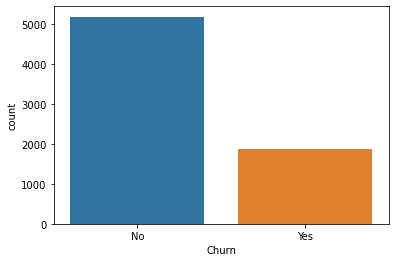

In [14]:
sns.countplot(x= df['Churn'])

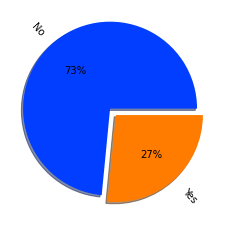

In [15]:
# Percentage of customers leaving
churn_data = churn_count.values
labels = churn_count.index
colors = sns.color_palette('bright')
explode = [0.1,0]

plt.pie(churn_data, labels=labels, colors = colors, autopct='%.0f%%', explode=explode,shadow=True, rotatelabels=True)
plt.show()

* . The data is imbalanced

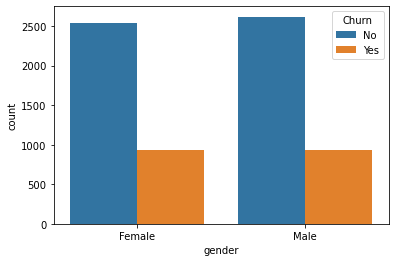

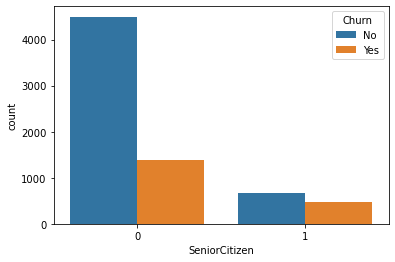

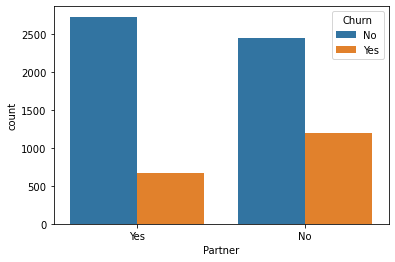

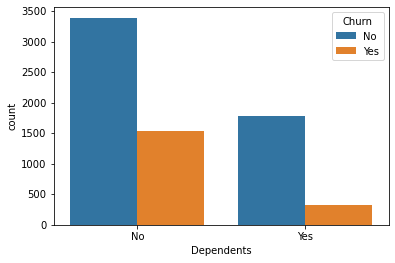

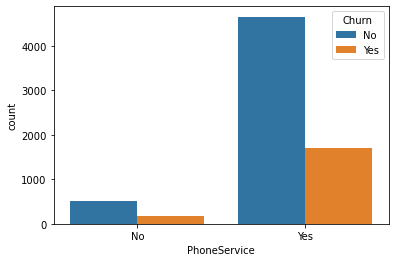

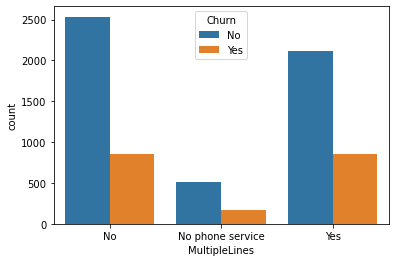

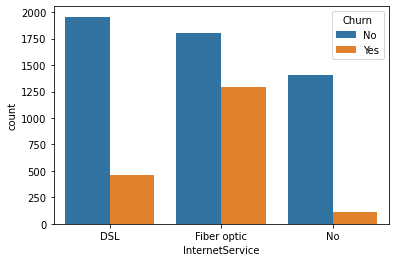

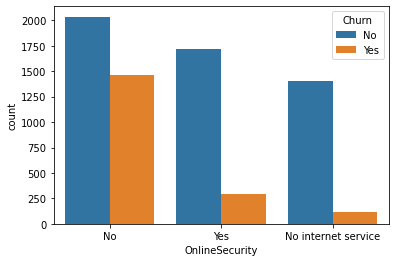

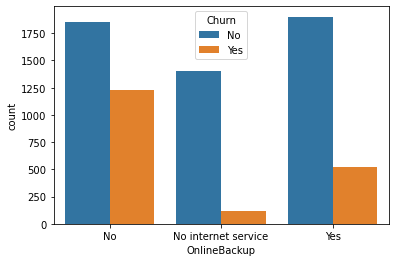

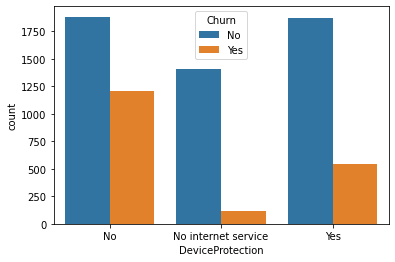

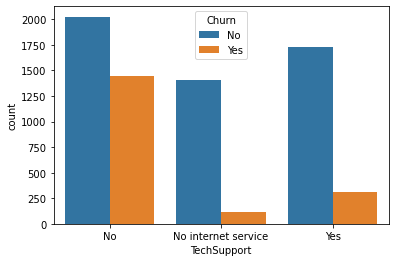

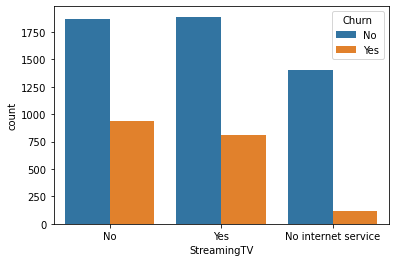

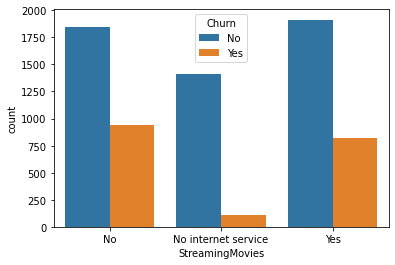

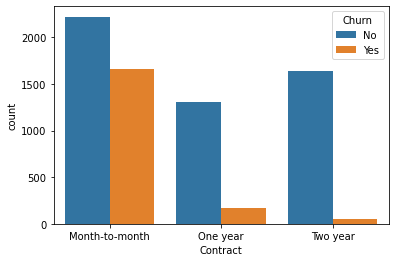

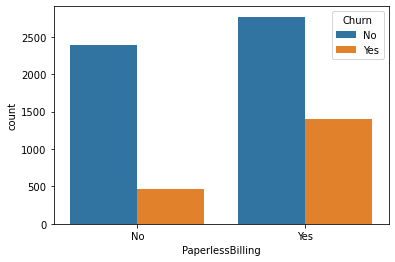

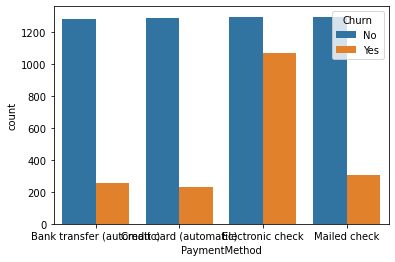

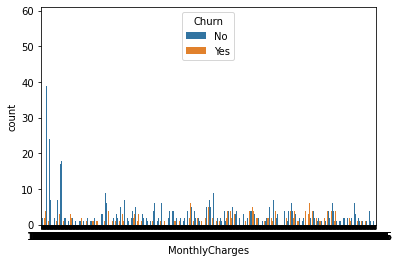

In [16]:
for i, j in enumerate(cleaned_data.drop(columns = ['Churn', 'TotalCharges'])):
    plt.figure(i)
    sns.countplot(data = cleaned_data, x = j, hue='Churn')

In [17]:
non_churnned_males = df[(df.gender == 'Male') & (df.Churn == 'No')].shape[0]
non_churnned_females = df[(df.gender == 'Female') & (df.Churn == 'No')].shape[0]

print('Count of males who didn\'t churn: ',non_churnned_males)
print('Count of females who didn\'t churn: ',non_churnned_females)

Count of males who didn't churn:  2625
Count of females who didn't churn:  2549


In [18]:
# groups = ['{0} - {1}'.format(i,i + 12) for i in range(1, 73)]
tenure_ranges = ["[{0} - {1})".format(i, i + 11) for i in range(1, 72, 12)]
tenure_ranges
count_tenure_ranges = len(tenure_ranges)
count_tenure_ranges
df['tenure_group'] = pd.cut(x=df['tenure'], bins=count_tenure_ranges, labels=tenure_ranges)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,[1 - 12)
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,[25 - 36)
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,[1 - 12)
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,[37 - 48)
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,[1 - 12)


In [19]:
df['tenure_group'].value_counts()

[1 - 12)     2186
[61 - 72)    1407
[13 - 24)    1024
[25 - 36)     832
[49 - 60)     832
[37 - 48)     762
Name: tenure_group, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

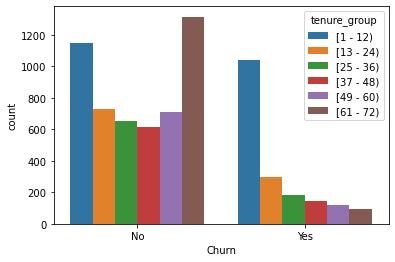

In [20]:
sns.countplot(x= df['Churn'], hue=df['tenure_group'])


<AxesSubplot:xlabel='Churn', ylabel='count'>

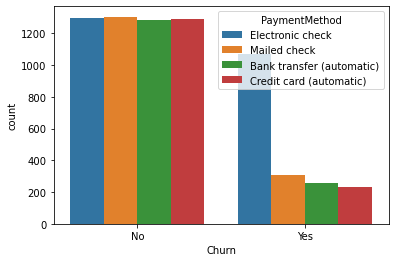

In [21]:
sns.countplot(x= df['Churn'], hue=df['PaymentMethod'])

# Data Cleaning and Feature Selection

##### Encoding

In [22]:
for column in cleaned_data.columns:
    if cleaned_data[column].dtype == np.number:
        continue
    else:
        cleaned_data[column] = LabelEncoder().fit_transform(cleaned_data[column])

In [23]:
cleaned_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
data_corr = cleaned_data.corr()
data_corr

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290
DeviceProtection,0.001348,-0.021124,0.165614,0.079723,0.004718,0.122614,0.045558,0.175789,0.187646,1.000000,0.240476,0.275947,0.289309,0.350067,-0.037596,-0.136460,0.163984,0.389066,-0.177883


<AxesSubplot:>

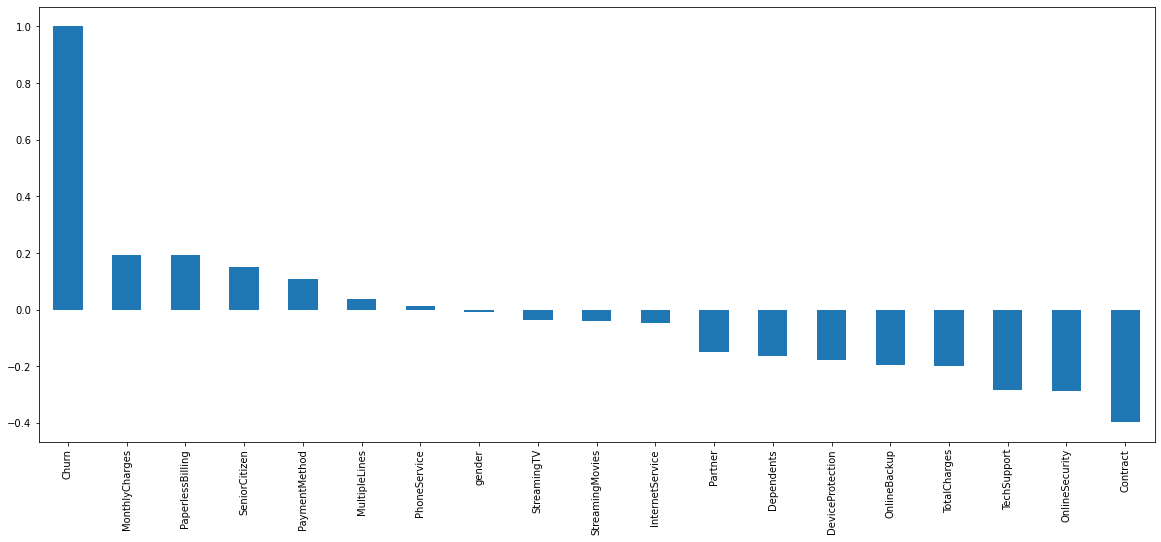

In [25]:
plt.figure(figsize=(20,8))
data_corr['Churn'].sort_values(ascending=False).plot(kind='bar')

* High churn seen in case of Month-to-month contracts, No online securoty, no tech support, first year of subscription and fibre optics internet

* Low churn is seen in cases of long term contracts, subscriptions without internet service and the customers engaged for 5+ years

* Factors like gender, availability of phone services and multiple lines have little impact on churn

<AxesSubplot:>

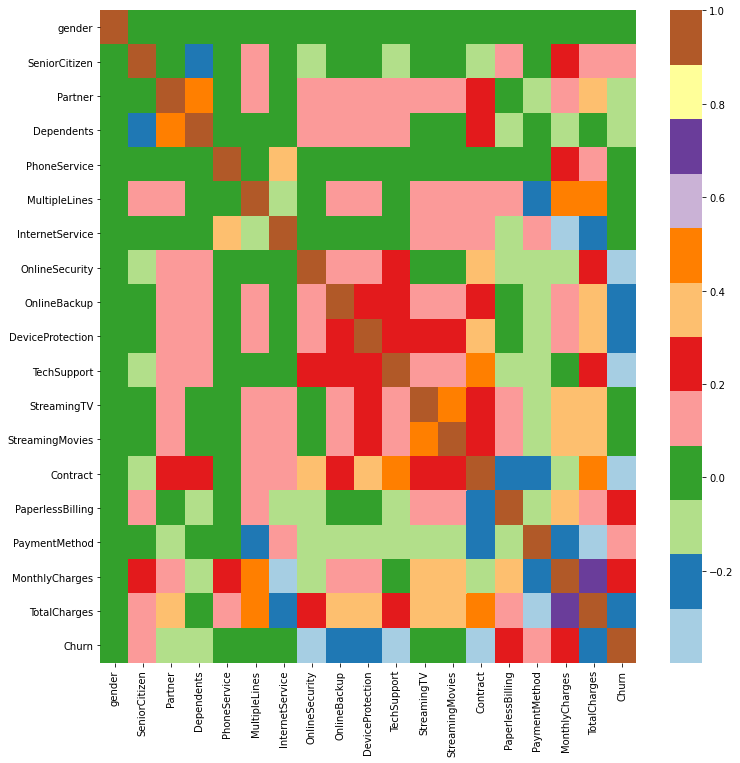

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='Paired')

### Conclusion

1. Electronic check medium are the highes churners
2. Contract type - Monthly customers are more likely to churn because of no contract terms.
3. No online security, no tech support category are high churners.
4. Non senior citizens are high churners

##### Scale Data

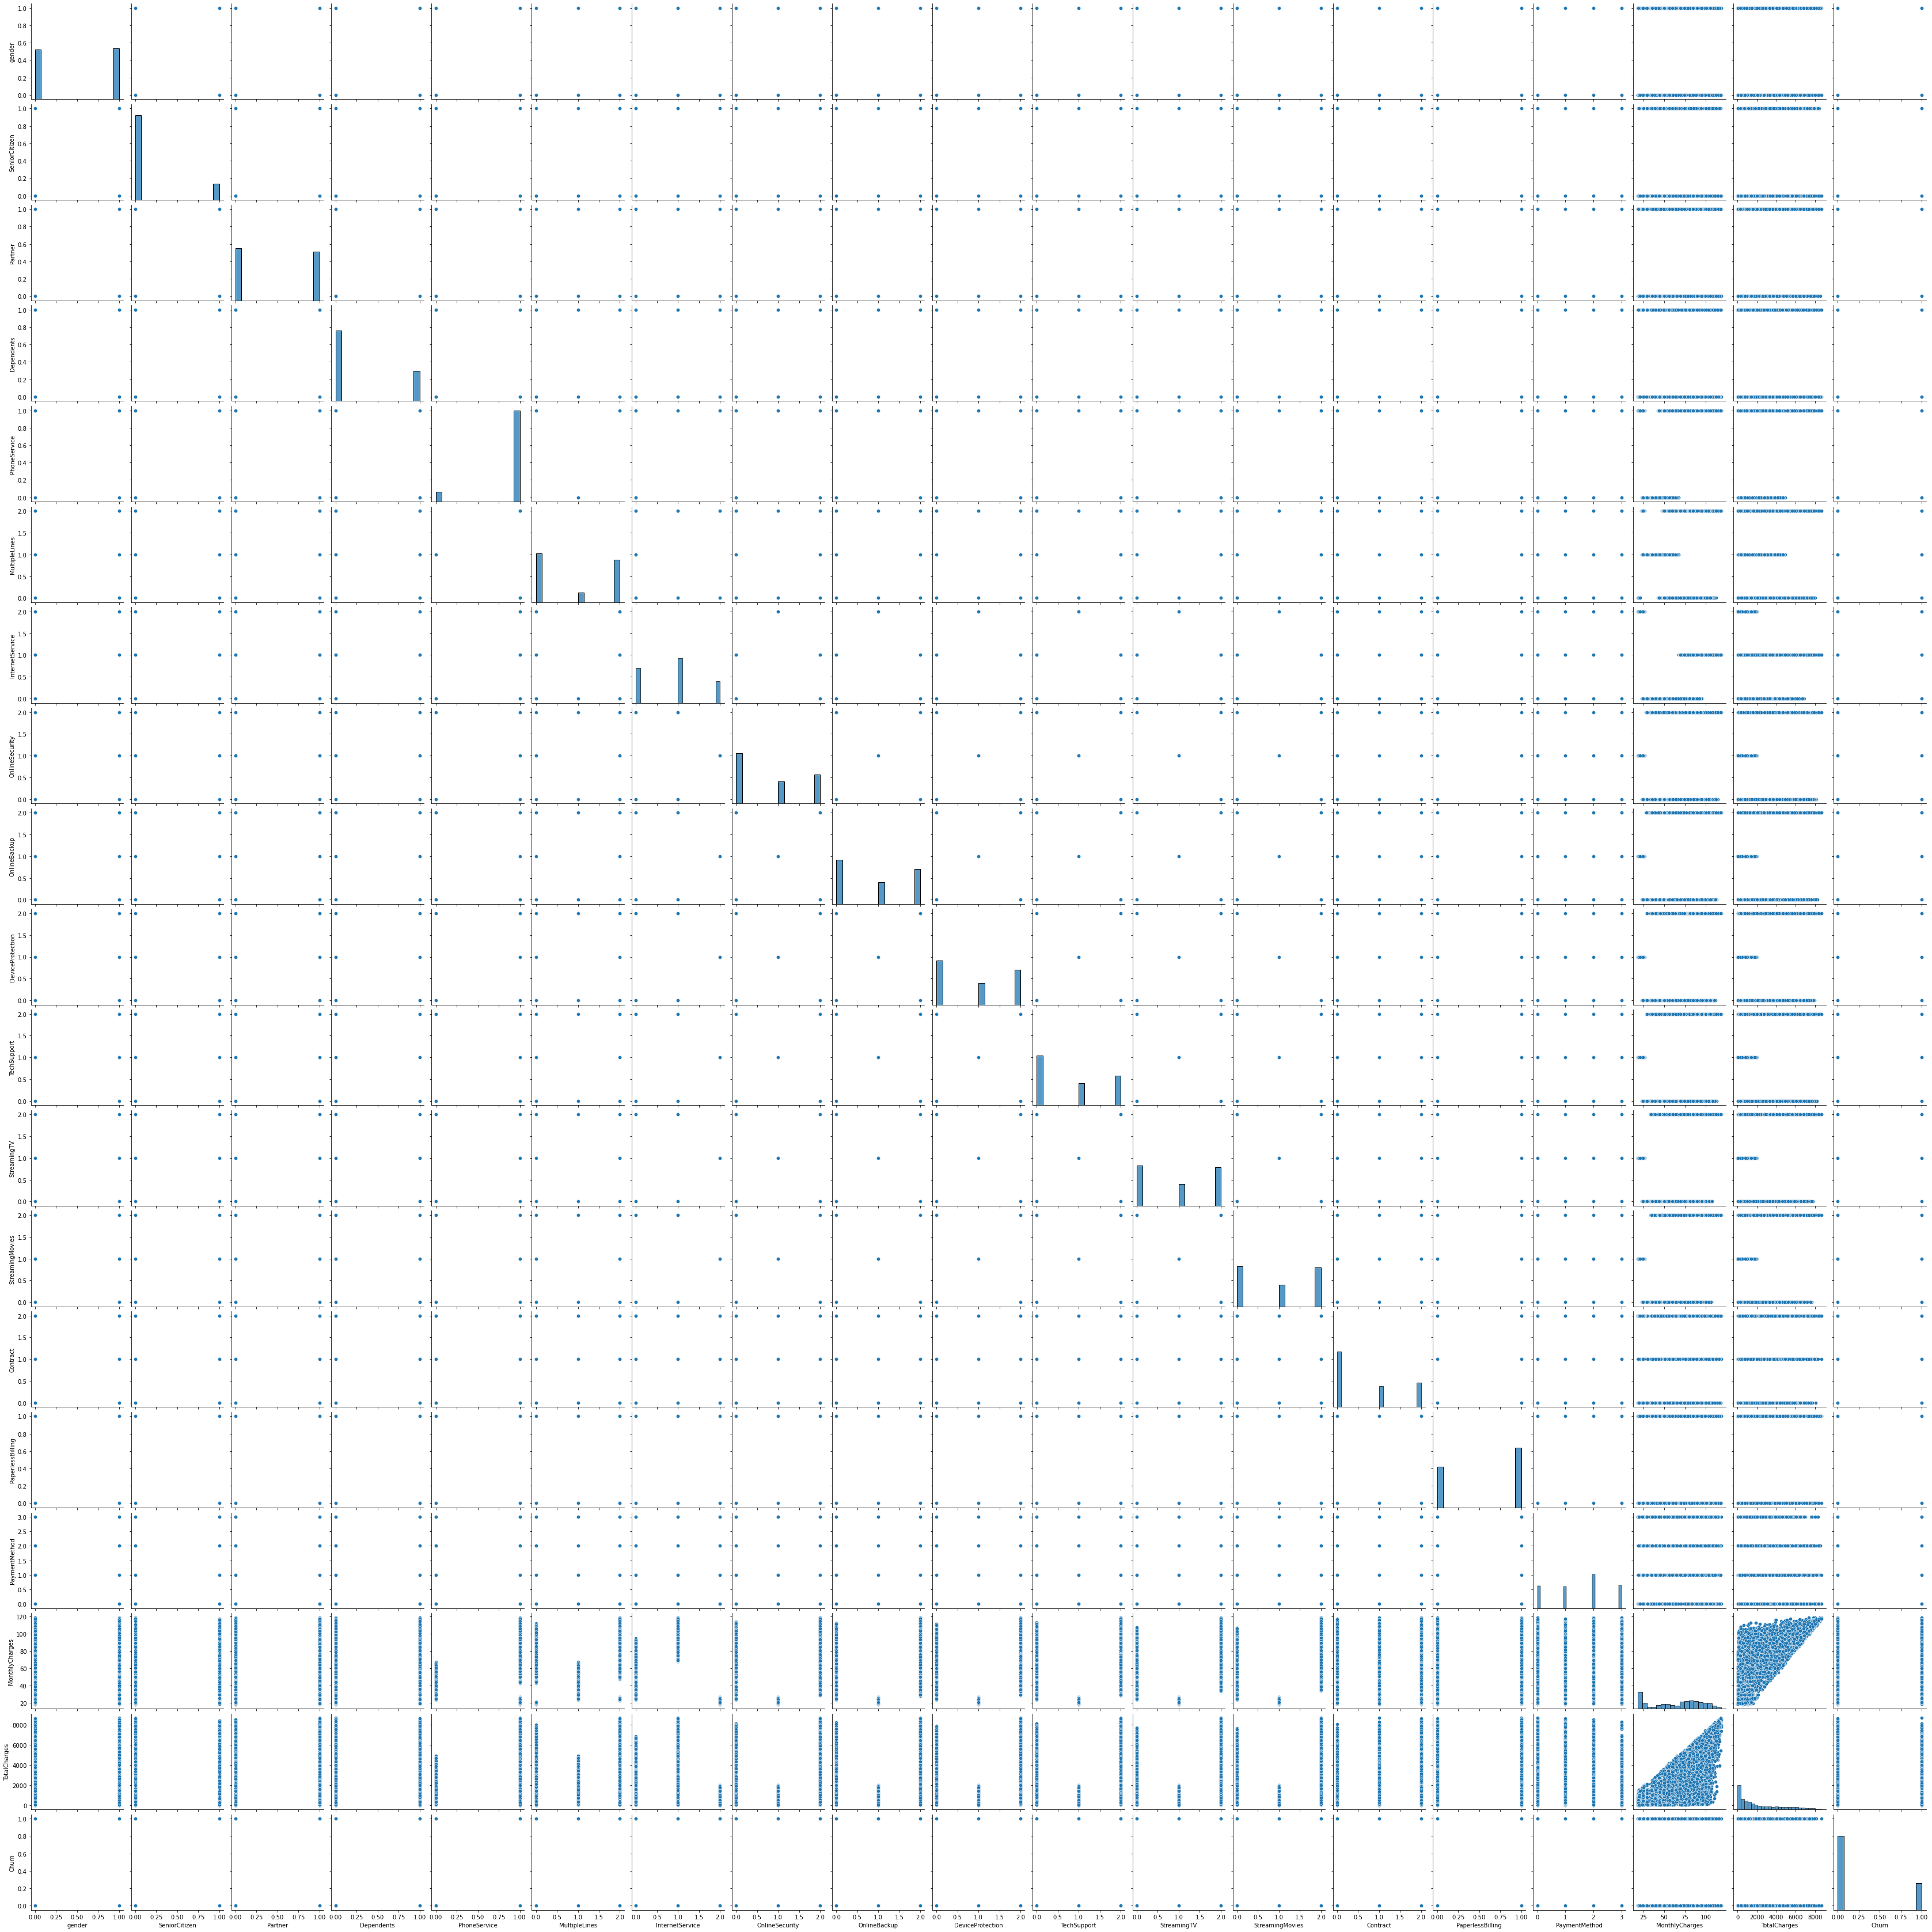

In [27]:
sns.pairplot(data = cleaned_data)

In [28]:
x = cleaned_data.drop('Churn', axis = 1)
y = cleaned_data['Churn']

X = MinMaxScaler().fit_transform(x)

#### Split Data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### Create Model

In [30]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
# Predictions
predictions = model.predict(x_test)

print(predictions)

[1 0 0 ... 0 0 1]


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1553
           1       0.50      0.54      0.52       557

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



### Boosting the algorithm used.

The data being imbalanced has contributed to the lower accuracy seen above (due to over sampling). 
Over-sampling using SMOTE and cleaning using ENN can be boost this model and increase it's accuracey and other metrics e.g the precision.

In [33]:
sm = SMOTEENN()

x_resampled,y_resampled = sm.fit_sample(X,y)

In [34]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.3)


In [35]:
model_dt_smote = DecisionTreeClassifier(criterion='gini')

In [36]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier()

In [37]:
y_pred_smote = model_dt_smote.predict(xr_test)

In [38]:
print(classification_report(yr_test,y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       866
           1       0.93      0.94      0.93       951

    accuracy                           0.93      1817
   macro avg       0.93      0.93      0.93      1817
weighted avg       0.93      0.93      0.93      1817

